# Image Classification with TensorFlow
## Sean Caldwell, Raphael Nation, Isaiah von Uders

Kaggle: https://www.kaggle.com/puneet6060/intel-image-classification

### With the prominence of climate change as a global issue, our project aims to identify long term change in landscapes. With our model, we can analyze images of landscapes from around the world and classify them into specific types of environments based on their characteristics. With this, we can observe the changes in a specific location over a period of time, and determine whether that location is being affected by climate change. 

For example, if the labels for a location shift from glacier to sea, it would indicate the area has been altered due to the impacts of climate change. 


Basic imports

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.datasets as datasets
import tensorflow.keras.utils as utils
import os
import random
import numpy as np
import matplotlib.pyplot as pl
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from google.colab import drive
from google.colab import auth

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4051751905855186970
]


Since our files are stored on google drive, we mount the drive and load the data. 
The data is from the intel image classification dataset that uses various images from natural scenes.

In [ ]:
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
training = keras.preprocessing.image_dataset_from_directory(
    '/gdrive/My Drive/MachineLearningFinal/inteldata/seg_train/seg_train',
    seed=0,
    image_size= (150,150),
    batch_size = 32,
    validation_split = 0.1,
    subset= "training"
)

Found 14034 files belonging to 6 classes.
Using 12631 files for training.


In [ ]:
validation = keras.preprocessing.image_dataset_from_directory(
    '/gdrive/My Drive/MachineLearningFinal/inteldata/seg_train/seg_train',
    seed=0,
    image_size= (150,150),
    batch_size = 32,
    validation_split = 0.1,
    subset="validation"
)

Found 14034 files belonging to 6 classes.
Using 1403 files for validation.


In [ ]:
testing = keras.preprocessing.image_dataset_from_directory(
    '/gdrive/My Drive/MachineLearningFinal/inteldata/seg_test/seg_test',
    seed=0,
    image_size= (150,150),
    batch_size = 32,
)

Found 3000 files belonging to 6 classes.


Here we create labels that will be used to identify our images. The labels are part of the Intel classification dataset.

In [ ]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

We build our model, it has 4 convolution layers, 4 maxpooling layers, 2 dense layers with relu activation, 2 dropout layers, and a dense layer with a softmax activation. The dropout layers and kernel regularizers serve the purpose of creating greater generalization which is important for natural scene classification.

In [ ]:
def classifier_model():
    conv = layers.Conv2D(32, (3,3), padding='same',kernel_regularizer='l1')
    pool = layers.MaxPooling2D((2,2))
    conv2 = layers.Conv2D(32, (3,3), padding='same',kernel_regularizer='l1')
    pool2 = layers.MaxPooling2D((2,2))
    conv3 = layers.Conv2D(32, (3,3), padding='same',kernel_regularizer='l1')
    pool3 = layers.MaxPooling2D((2,2))
    conv4 = layers.Conv2D(32, (3,3), padding='same',kernel_regularizer='l1')
    pool4 = layers.MaxPooling2D((2,2))
    flatten_input = layers.Flatten()
    dense1 = layers.Dense(1000,activation="relu")
    do1 = layers.Dropout(0.2)
    
    dense2 = layers.Dense(500,activation="relu")
    do2 = layers.Dropout(0.2)
    densefinal = layers.Dense(6,activation="softmax")
    model = models.Sequential([layers.Input(shape=(150,150,3)),
                               conv,pool,conv2,pool2,conv3,pool3,conv4,pool4,flatten_input,dense1,do1,dense2,do2,densefinal])
    return model

In [ ]:
model1 = classifier_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 32)        9

Now we train the model given our training data, and we cross-validate our model with our validation data set (which is 10% of the training data)

In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
modelrun = model1.fit(training, epochs=10, validation_data=validation)

Epoch 1/10
395/395 [==============================] - 3682s 9s/step - loss: 32.6463 - acc: 0.4370 - val_loss: 14.7032 - val_acc: 0.6550
Epoch 2/10
395/395 [==============================] - 352s 891ms/step - loss: 14.4551 - acc: 0.6388 - val_loss: 13.1915 - val_acc: 0.7092
Epoch 3/10
395/395 [==============================] - 353s 892ms/step - loss: 12.7846 - acc: 0.7002 - val_loss: 11.4249 - val_acc: 0.7213
Epoch 4/10
395/395 [==============================] - 352s 891ms/step - loss: 10.8999 - acc: 0.7360 - val_loss: 9.4788 - val_acc: 0.7263
Epoch 5/10
395/395 [==============================] - 351s 889ms/step - loss: 8.9091 - acc: 0.7601 - val_loss: 7.5794 - val_acc: 0.7334
Epoch 6/10
395/395 [==============================] - 352s 890ms/step - loss: 7.0461 - acc: 0.7771 - val_loss: 5.8896 - val_acc: 0.7498
Epoch 7/10
395/395 [==============================] - 352s 890ms/step - loss: 5.4416 - acc: 0.7837 - val_loss: 4.5213 - val_acc: 0.7733
Epoch 8/10
395/395 [=======================

In [ ]:
model1.save('/gdrive/My Drive/MachineLearningFinal/classifier_model')

INFO:tensorflow:Assets written to: /gdrive/My Drive/MachineLearningFinal/classifier_model/assets


Over each epoch, here is the accuracy and validation accuracy of our model.

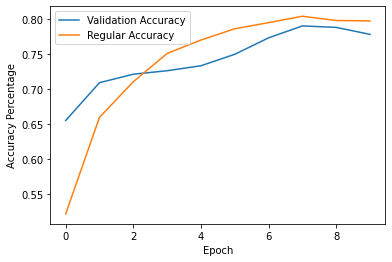

In [ ]:
pl.plot(modelrun.history['val_acc']);
pl.plot(modelrun.history['acc']);
pl.xlabel("Epoch")
pl.ylabel("Accuracy Percentage")
pl.legend(['Validation Accuracy', 'Regular Accuracy'], loc='upper left');

Now that training is complete, we can test our model (and its overall accuracy) in regards to the testing dataset.

In [ ]:
model1.evaluate(testing)

94/94 [==============================] - 719s 7s/step - loss: 2.2123 - acc: 0.7810


[2.2122552394866943, 0.781000018119812]

After several iterations we found a model that can accurately predict expected outputs for several images. We can load this model that has the same architecture as the one above.

In [ ]:
model2 = models.load_model('/gdrive/My Drive/MachineLearningFinal/test5')

We now load in our prediction data and pass it into an array. We do this so that we can feed it into our model so that it can attempt to classify each image.

In [ ]:
files = os.listdir('/gdrive/My Drive/MachineLearningFinal/inteldata/seg_pred/seg_pred')
print(len(files))
print(files[:10])

7330
['7243.jpg', '7186.jpg', '7190.jpg', '7211.jpg', '7162.jpg', '7183.jpg', '7177.jpg', '7219.jpg', '7244.jpg', '7194.jpg']


In [ ]:
def predict(files, n, model, shuffle=True):
    if shuffle == True:
        random.shuffle(files)
    pl.figure(figsize=(20, (n//4 + 1)*5))
    for i in range(n):
        image = tf.keras.preprocessing.image.load_img('/gdrive/My Drive/MachineLearningFinal/inteldata/seg_pred/seg_pred/' + files[i])
        input_arr = keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])
        name = labels[np.argmax(model.predict(input_arr))]
        ax = pl.subplot(n//4+1,4, i+1)
        pl.title(name)
        pl.imshow(image)
        pl.axis('off')

Now we attempt to predict 12 random images with our model.

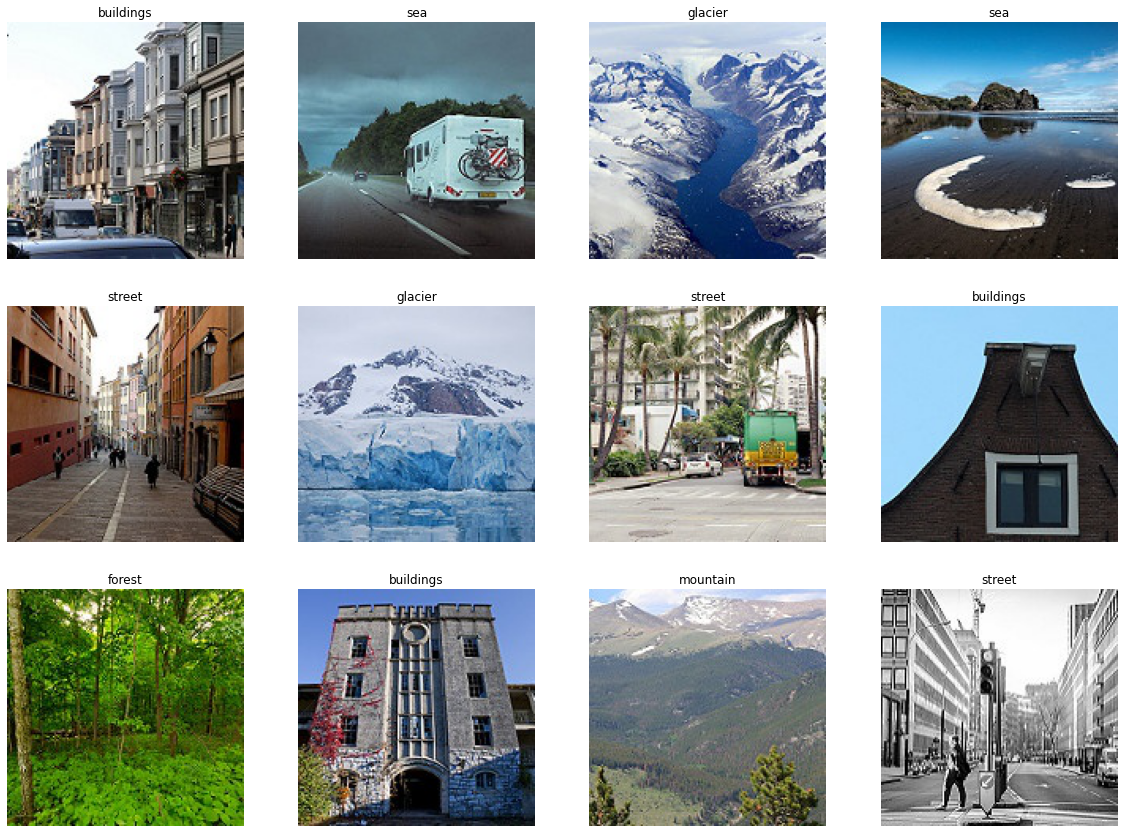

In [ ]:
predict(files,12,model2)

Source: https://www.youtube.com/watch?v=dzRvmjBGqp8

The timelapse of this glacier melting (out of order because the video clip is split in the video) shows various stages where the classification changes from glacier to sea, demonstrating the tracking ability of the network on changing scenes.

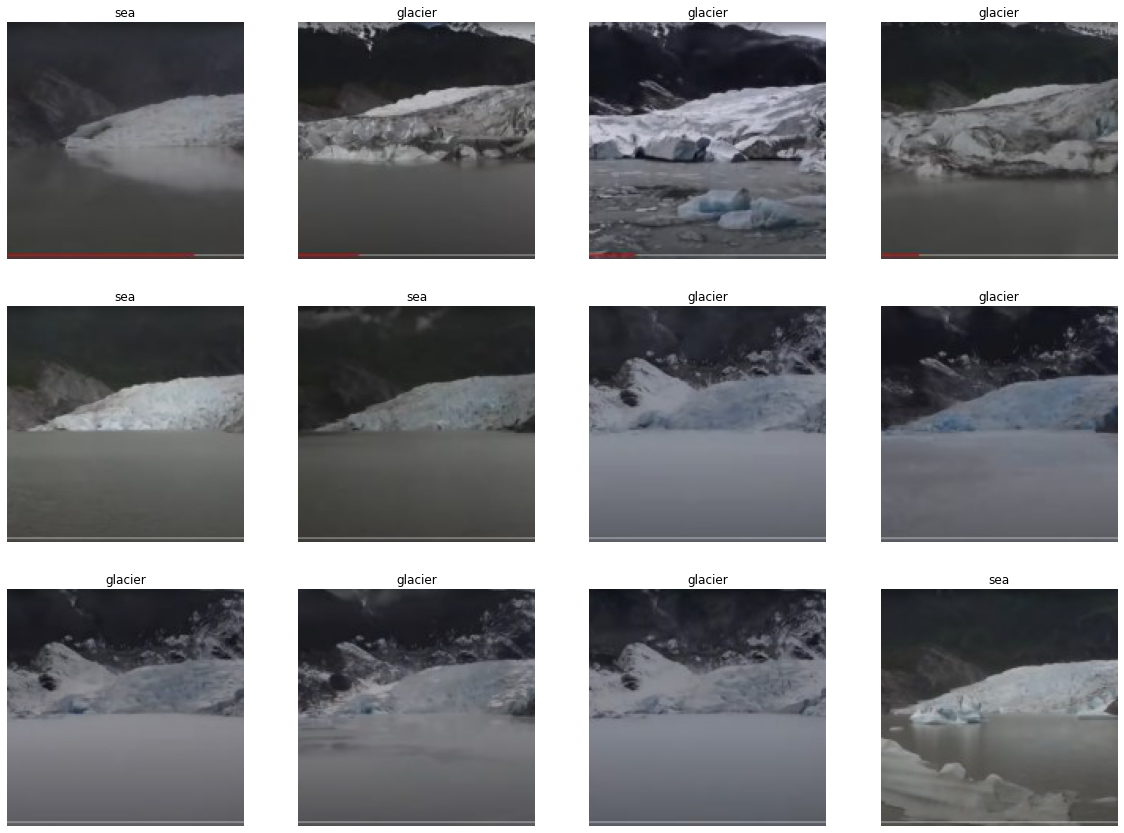

In [ ]:
glaciertimelapse = ['g1.jpg','g2.jpg','g3.jpg','g4.jpg','g5.jpg','g6.jpg','g7.jpg','g8.jpg','g9.jpg','g10.jpg','g11.jpg','g12.jpg','g13.jpg','g14.jpg','g15.jpg']
predict(glaciertimelapse,12,model2,False)

Source: https://auburnpub.com/news/world/then-and-now-how-glaciers-around-the-world-are-melting/collection_eafe128a-cb20-586c-abff-3a71ffbca80b.html#3

In [ ]:
glaciers1 = ['b2.jpg', 'a2.jpg']
glaciers2 = ['b3.jpg', 'a3.jpg']
glaciers3 = ['b4.jpg', 'a4.jpg']

The Mendenhall glacier, Alaska (2007,2015)

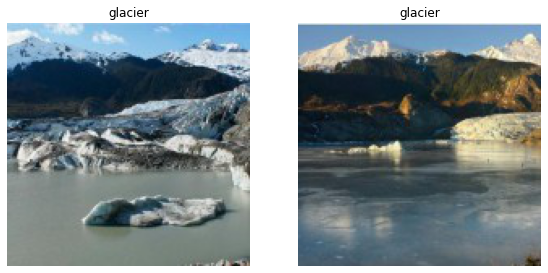

In [ ]:
predict(glaciers1,2,model2,False)

The Stein glacier, Switzerland (2006,2015)

Due to climate change, the snow that one made up this glacier, has melted away. This had led our model to identify the same image as a mountain in just a 9 year difference. 

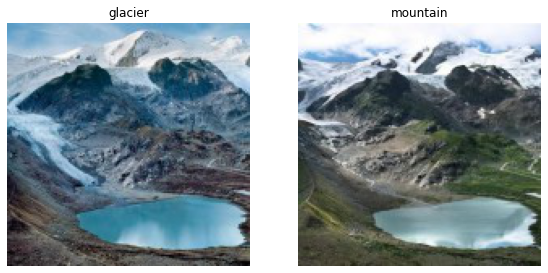

In [ ]:
predict(glaciers2,2,model2,False)

The Trift glacier, Switzerland (2006,2015)

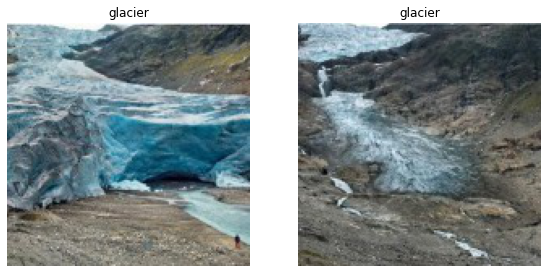

In [ ]:
predict(glaciers3,2,model2,False)

Sources: https://www.boredpanda.com/how-famous-city-changed-timelapse-evolution-before-after/?utm_source=duckduckgo&utm_medium=referral&utm_campaign=organic

https://www.scoopwhoop.com/world/before-after-pics-world-cities/

In [ ]:
area1 = ['sing1.jpg', 'sing2.jpg']
area2 = ['jj2.jpg', 'jj1.jpg']
area3 = ['jj6.jpg', 'jj5.jpg'] 
area4 = ['jj8.jpg', 'jj7.jpg']

Singapore (2000,2017~)

Over the span of 17 years, the sea that once was in Singapore has been overtaken by buildings.

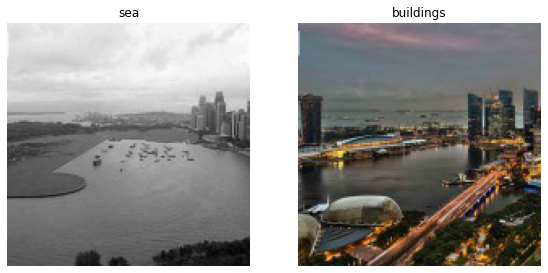

In [ ]:
predict(area1,2,model2,False)

Melbourne, Australia (1920, 2017~)

Over nearly 100 years later, the sea in Melbourne has been reduced due to the increase of buildings in the area.

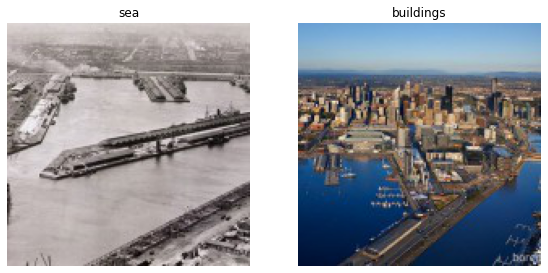

In [ ]:
predict(area2,2,model2,False)

Long Beach, USA (1953, 2009)

The same photos in Long Beach, as more buildings were added to the area the harder it was to determine that this area contains a sea.

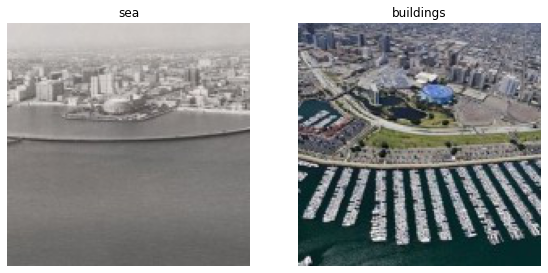

In [ ]:
predict(area3,2,model2,False)

Berlin, Germany (1945, 1990)


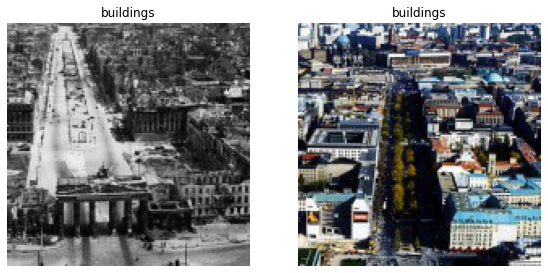

In [ ]:
predict(area4,2,model2,False)

### Conclusion

Even with our model, and the several redesigns it went through, it only reached an accuracy of about 80%. Even with more iterations of training, our model did not seem to change in accuracy. This is a very prevelent problem in machine learning, as there is no such thing as a perfect model. Our model can still accurately classify most of the images. However, as shown, 20% of the time it still can make an incorrect classification.